# Lab: Sentiment analysis using LSTM

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Step 1: Load data
Data consists of 32000 tweets and has come from kaggle website. We have summerized the data so we work with a small dataset. The original data can be accessed through the following link: https://www.kaggle.com/kazanova/sentiment140/version/1. 

In [14]:
data = pd.read_csv("/data/text/twitter-sentiment/twitter-sentiment.csv" ,usecols = [1,2], header = None , names=["sentiment","text"])
data

,sentiment,text
0,sentiment,text
1,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,0,Broadband plan 'a massive broken promise' http...
3,0,Body Of Missing Northern Calif. Girl Found: P...
4,0,@onemoreproject that is lame
...,...,...
31996,4,@jerseyshorejen haha I know that's why I said ...
31997,4,@cherub_rock123 ehh....it's a day.
31998,4,"sick, sick, sick today, but still fingers cros..."
31999,4,@cris1015 My goal on stocks like $MTXX is to h...


## Step 2: Explore data

In [3]:
print("Values in \"sentiment\" :")
print(data['sentiment'].value_counts())
# data.head()

Values in "sentiment" :
0            16000
4            16000
sentiment        1
Name: sentiment, dtype: int64


,sentiment,text
0,sentiment,text
1,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,0,Broadband plan 'a massive broken promise' http...
3,0,Body Of Missing Northern Calif. Girl Found: P...
4,0,@onemoreproject that is lame


## Step 3: Shape data

In [4]:
# Substitutes 0 with neg and 4 with pos
data['sentiment'] = ['neg' if (x=='0') else 'pos' for x in data['sentiment']]

In [5]:
tokenizer = Tokenizer(num_words=2500, lower=True, split=' ')

tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)

X = pad_sequences(X)

In [13]:
X

array([[   0,    0,    0, ...,    0,    0,  627],
       [   0,    0,    0, ...,   41,    8,  400],
       [   0,    0,    0, ...,   10,   62,   36],
       ...,
       [   0,    0,    0, ...,  528,   29, 1156],
       [   0,    0,    0, ...,    3,  730,    8],
       [   0,    0,    0, ...,   71,   33,   26]], dtype=int32)

## Step 4: Build model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 37, 128)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               263200    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 583,602
Trainable params: 583,602
Non-trainable params: 0
_________________________________________________________________
None


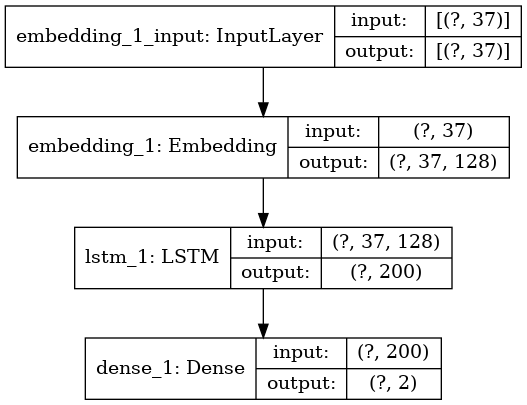

In [10]:
embed_dim = 128
lstm_out = 200
batch_size = 32

model = tf.keras.Sequential()
model.add(layers.Embedding(2500, embed_dim,input_length = X.shape[1]))
model.add(layers.LSTM(lstm_out))
model.add(keras.layers.Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [7]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.20, random_state = 36)

## Train model

In [11]:
model.fit(X_train, Y_train, batch_size =batch_size, epochs = 5)

Train on 25600 samples
Epoch 1/5
25600/25600 [==============================] - 61s 2ms/sample - loss: 0.5357 - accuracy: 0.7309
Epoch 2/5
25600/25600 [==============================] - 59s 2ms/sample - loss: 0.4493 - accuracy: 0.7909
Epoch 3/5
25600/25600 [==============================] - 62s 2ms/sample - loss: 0.4103 - accuracy: 0.8120
Epoch 4/5
25600/25600 [==============================] - 61s 2ms/sample - loss: 0.3745 - accuracy: 0.8274
Epoch 5/5
25600/25600 [==============================] - 58s 2ms/sample - loss: 0.3381 - accuracy: 0.8440


## Evaluate model

In [9]:
score, acc = model.evaluate(X_valid, Y_valid, verbose=2, batch_size = batch_size)
print("Score: %.2f" % (score))
print("Validation accuracy: %.2f" % (acc))

6401/1 - 5s - loss: 0.3076 - accuracy: 0.7622
Score: 0.55
Validation accuracy: 0.76
